# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

### 5. Drew Mitchner's Implementation of DQN

My implementation will begin here in this workspace. My plan is to begin with an architecture similar to what was used in the coding excercise from the previous lesson, while adding in some of the new improvements such as dueling DQN, etc.

## 5.1 Start the Environment

Install any packages and load the environment into the workspace.

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.20 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 5.3 Initialize the agent

From Deep Q-Learning Lesson 2 excercise

In [4]:
from dqn_agent import Agent
from collections import deque
import matplotlib.pyplot as plt

env_info = env.reset(train_mode=True)[brain_name]

state = env_info.vector_observations[0]
state_size = len(state)

action_size = brain.vector_action_space_size

agent = Agent(state_size, action_size, seed=0)

## 5.3 Train the agent with DQN

The cell below contains the main loop for executing the Deep Q-Learning algorithm.

In [5]:
def dqn(n_episodes=800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning
   
       Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    
    scores = []                        # List for keeping track of scores
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    
    # Loop through all episodes
    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        score = 0 # this episode's score
        
        # Play the i-th episode
        while True:
            
            state = env_info.vector_observations[0]            # get the current state
            action = agent.act(state, eps)                     # select an action according to the policy
            
            env_info = env.step(action)[brain_name]            # send the action to the environment
            
            next_state = env_info.vector_observations[0]       # get the next state
            reward = env_info.rewards[0]                       # get the reward
            done = env_info.local_done[0]                      # see if episode has finished
            score += reward                                    # update the score
            
            agent.step(state, action, reward, next_state, done)# update the Q-networks
            
            state = next_state                                 # roll over to the next state
            if done:
                break
             
             ### End episode t  
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
            
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
                
    return scores

Episode 100	Average Score: 0.73
Episode 200	Average Score: 4.39
Episode 300	Average Score: 8.40
Episode 400	Average Score: 9.60
Episode 500	Average Score: 12.18
Episode 600	Average Score: 13.92
Episode 700	Average Score: 14.47
Episode 800	Average Score: 15.46


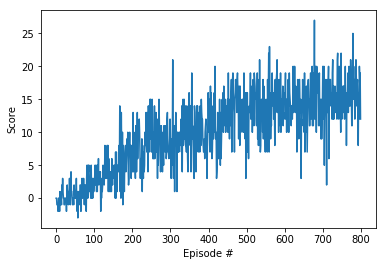

In [6]:
# Run the dqn algorithm
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
import torch
torch.save(agent.qnetwork_local.state_dict(), 'model.pth')